In [1]:
import pymysql as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [2]:
plt.rc("font",family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

In [3]:

con = m.connect(host ='localhost', user = 'root', password = '1234', db = 'project_py', charset = 'utf8')
cur = con.cursor()
q = """SELECT data, nation, SUM(N_visitor) "국가별 방문자 수"
FROM project_csv
GROUP BY 1
ORDER BY 2 DESC"""
cur.execute(q)
res = cur.fetchall()
col = ["date", "nation", "num_visitor_by_nation"]
df1 = pd.DataFrame(res)
con.close()
df1

OperationalError: (1055, "Expression #2 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'project_py.project_csv.nation' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/yganalyst/data_example/main/weather.csv", encoding='cp949')
df["일시"] = pd.to_datetime(df["일시"])
df.head(5)

In [ ]:
con = m.connect(host ='localhost', user = 'root', password = '1234', charset = 'utf8')
cur = con.cursor()   # mysql에 입력 시작 코드.

In [ ]:
import pymysql as m
q = "USE project_py;"
cur.execute(q)
con.close()

In [4]:
import pymysql as m
import pandas as pd
con = m.connect(host ='localhost', user = 'root', password = '1234', db = 'project_py', charset = 'utf8')
cur = con.cursor()
q = "SELECT * FROM project_csv"
cur.execute(q)
res = cur.fetchall()
col = ["date", "nation", "growth_lastyear", "ratio_lastyear"]
df1 = pd.DataFrame(res)
con.close()
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19-01,Japan,206526,23.606800,18.693500,75070,129029,198805,2233,127,785,4576,18015,57921,34165,39811,33857,20330
1,19-01,Taiwan,87954,16.003700,7.961060,30805,56202,86393,74,22,180,1285,18888,17927,18595,18862,8169,4566
2,19-01,Hong Kong,35896,3.533210,3.249090,12172,22729,34653,59,2,90,1092,3890,11384,7400,5461,4629,2137
3,19-01,Macao,2570,-12.376400,0.232621,748,1787,2506,2,0,17,45,223,1013,762,264,181,92
4,19-01,Phillipines,30473,0.062389,2.758230,10460,7295,14279,211,161,184,15638,1436,5051,5486,3140,1831,811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,20-04,Oceania others,13,-97.239900,0.044195,0,0,0,0,0,0,13,0,0,0,0,0,0
955,20-04,South Africa,22,-98.101800,0.074792,3,2,2,0,0,0,20,0,1,4,0,0,0
956,20-04,Africa others,177,-95.412100,0.601734,30,6,11,5,0,11,150,3,9,16,6,2,0
957,20-04,Stateless,3,-95.312500,0.010199,0,0,0,0,0,0,3,0,0,0,0,0,0


In [5]:

con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(방문자_수) '국가별 방문자 수'
FROM project_csv2
GROUP BY 1
ORDER BY 2 DESC"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['국가', '방문자_수']
df_VbyNation = pd.DataFrame(res, columns = col)
con.close()

df_VbyNation

,국가,방문자_수
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159
5,Thailand,644523
6,Vietnam,624921
7,Phillipines,560570
8,Malaysia,455722
9,Russia,400628


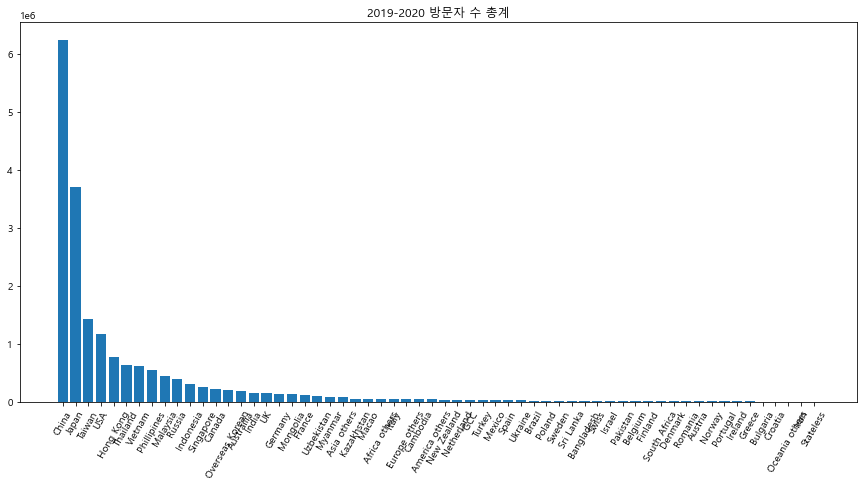

In [6]:
index = df_VbyNation['국가']
data = df_VbyNation['방문자_수']
colors = ['#FBFFB9', '#FDD692', '#EC7357', '#754F44', '#B2EBF4']
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.bar(index, data)
plt.rcParams['font.size'] = 10
plt.title('2019-2020 방문자 수 총계')
plt.show()

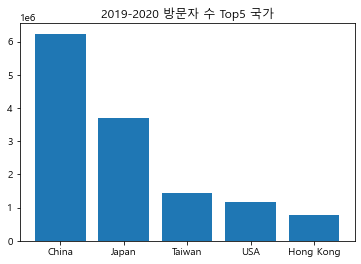

In [7]:
# 1) 데이터 기간내 국가별 방문자수(19.1~20.4)

top5_num = df_VbyNation.head(5)
index = top5_num['국가']
data = top5_num['방문자_수']
colors = ['#FBFFB9', '#FDD692', '#EC7357', '#754F44', '#B2EBF4']
plt.bar(index, data)
plt.title('2019-2020 방문자 수 Top5 국가')
plt.show()

<AxesSubplot:title={'center':'2019-2020 방문자 수 TOP10 국가'}, xlabel='국가', ylabel='방문자_수'>

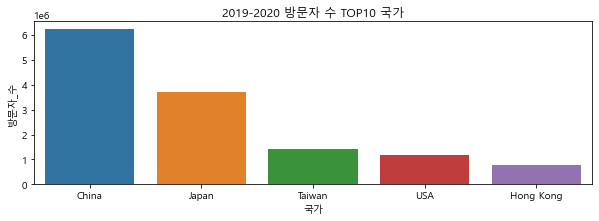

In [8]:
plt.figure(figsize=(10, 3))
plt.title('2019-2020 방문자 수 TOP10 국가')

sns.barplot(data=top5_num, x = '국가', y = '방문자_수')

In [9]:
# 2)방문자 수 상위 5개 국가가 차지하는 방문자 수 비율
# top5_nation_visitor_ratio
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(방문자_수) / (SELECT SUM(방문자_수) FROM project_csv2)*100 '나라별 비율'
FROM project_csv2
WHERE 국가 IN ('china','Japan','Taiwan','USA','Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_visitorT5 = pd.DataFrame(res)
con.close()
df_visitorT5

col = ['국가', '방문자 수 비율']
df_visitorT5 = pd.DataFrame(res, columns =col)
df_visitorT5

,국가,방문자 수 비율
0,China,32.5144
1,Japan,19.2671
2,Taiwan,7.4274
3,USA,6.1036
4,Hong Kong,4.0830


In [10]:
sum_of_etc = 100.0-float(df_visitorT5["방문자 수 비율"].sum())              
sum_of_etc

data ={"국가": "Others", "방문자 수 비율":sum_of_etc}

df_visitorT5 = df_visitorT5.append(data,  ignore_index=True)
df_visitorT5

,국가,방문자 수 비율
0,China,32.5144
1,Japan,19.2671
2,Taiwan,7.4274
3,USA,6.1036
4,Hong Kong,4.0830
5,Others,30.6045


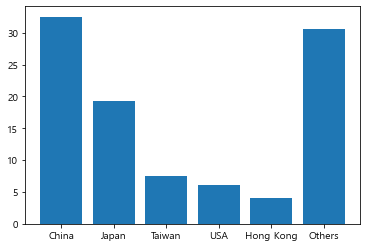

In [11]:
# 2)방문자 수 상위 5개 국가가 차지하는 방문자 수 비율
top5_ratio = df_visitorT5.head(6)
index = top5_ratio['국가']
data_ratio = top5_ratio['방문자 수 비율']
plt.bar(index, data_ratio)
plt.show()

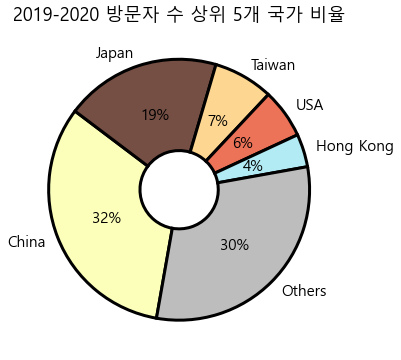

In [12]:
# 2)방문자 수 상위 5개 국가가 차지하는 방문자 수 비율
data = top5_ratio['방문자 수 비율']
labels = top5_ratio['국가']
colors = ['#FBFFB9', '#754F44', '#FDD692', '#EC7357', '#B2EBF4','#BDBDBD']
wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3}
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('2019-2020 방문자 수 상위 5개 국가 비율')
plt.show()



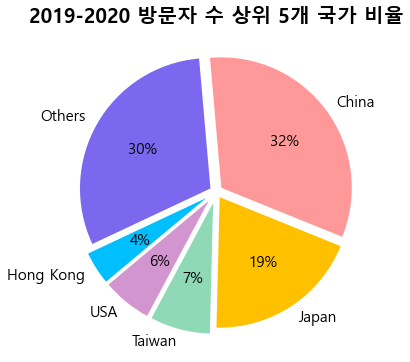

In [13]:

data = top5_ratio['방문자 수 비율']
labels = top5_ratio['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
explode = [0.05, 0.05, 0.09, 0.09, 0.09, 0.05]
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 방문자 수 상위 5개 국가 비율', fontsize = 20 , fontweight = 'bold')
plt.show()

In [14]:
# 관광 비중이 높아 방문 목적별 TOP5 국가를 선정함
# 4) 관광 목적 TOP 5 / 1. 중국 2. 일본 3. 대만 4. 미국 5. 홍콩

con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(관광)/(SELECT SUM(관광) FROM project_csv2)*100 관광비율
FROM project_csv2
WHERE 국가 IN ('China', 'Japan', 'Taiwan', 'USA', 'Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_purT5 = pd.DataFrame(res)
con.close()

col = ['국가', '관광 비율']
df_purT5 = pd.DataFrame(res, columns =col)
df_purT5

,국가,관광 비율
0,China,32.0197
1,Japan,22.8640
2,Taiwan,8.9246
3,USA,5.6434
4,Hong Kong,4.8862


In [15]:
sum_of_etc = 100.0-float(df_purT5["관광 비율"].sum())              
sum_of_etc

25.662099999999995

In [16]:
data ={"국가": "Others", "관광 비율":sum_of_etc}

In [17]:
df_purT5 = df_purT5.append(data,  ignore_index=True)
df_purT5

,국가,관광 비율
0,China,32.0197
1,Japan,22.8640
2,Taiwan,8.9246
3,USA,5.6434
4,Hong Kong,4.8862
5,Others,25.6621


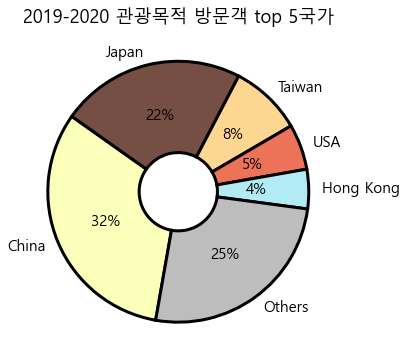

In [18]:
# 관광목적 방문객 top 5국가
# 추가과제 => others 행 추가하기.(top 5국가를 제외한 나머지 국가 총합.)

data = df_purT5['관광 비율']
labels = df_purT5['국가']
colors = ['#FBFFB9', '#754F44', '#FDD692', '#EC7357', '#B2EBF4','#BDBDBD']
wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3}
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('2019-2020 관광목적 방문객 top 5국가')
plt.show()

In [19]:
# 공무 목적 TOP 5 / 1. 미국 2. 중국 3. 몽골 4. 베트남 5. 태국 
# 6) 공무 목적 방문객 top 5 국가

con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(공무)/(SELECT SUM(공무) FROM project_csv2)*100 공무비율
FROM project_csv2
WHERE 국가 IN ('USA', 'China', 'Vietnam', 'Mongolia', 'Thailand')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_officeT5 = pd.DataFrame(res)
con.close()

col = ['국가', '공무 비율']
df_officeT5 = pd.DataFrame(res, columns =col)
df_officeT5

,국가,공무 비율
0,USA,49.2453
1,China,5.8443
2,Mongolia,5.2467
3,Vietnam,5.1957
4,Thailand,4.9669


In [20]:
sum_of_etc = 100.0-float(df_officeT5["공무 비율"].sum())              
sum_of_etc

data ={"국가": "Others", "공무 비율":sum_of_etc}

df_officeT5 = df_officeT5.append(data,  ignore_index=True)
df_officeT5

,국가,공무 비율
0,USA,49.2453
1,China,5.8443
2,Mongolia,5.2467
3,Vietnam,5.1957
4,Thailand,4.9669
5,Others,29.5011


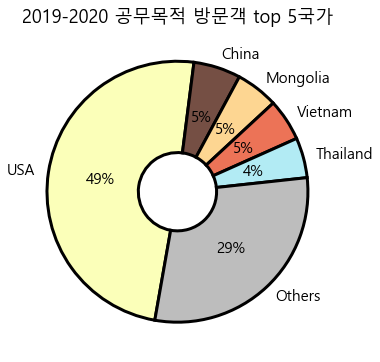

In [21]:
data = df_officeT5['공무 비율']
labels = df_officeT5['국가']
colors = ['#FBFFB9', '#754F44', '#FDD692', '#EC7357', '#B2EBF4','#BDBDBD']
wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3}
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('2019-2020 공무목적 방문객 top 5국가')
plt.rcParams['font.size'] = 15
plt.show()

In [22]:
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)
FROM expenditure
WHERE class_1 = '거주국'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['국가', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure

,국가,1인 평균 지출비용
0,GCC,2558.0
1,중동전체,2266.0
2,중국,2016.0
3,몽골,1842.0
4,중앙아시아,1581.0
5,인도,1514.0
6,싱가포르,1500.0
7,러시아,1479.0
8,기타중동,1429.0
9,기타,1316.0


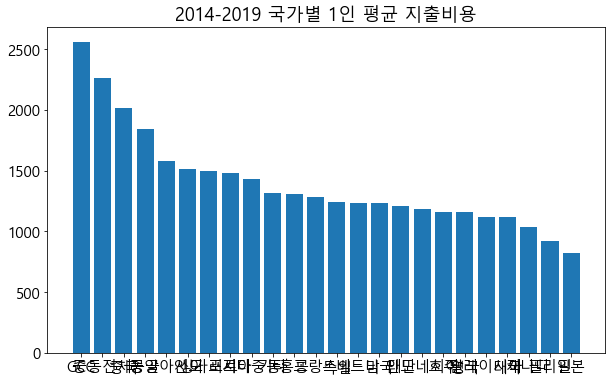

In [23]:
avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['국가']
data = df_avg_expenditure['1인 평균 지출비용']
colors = ['#FBFFB9', '#FDD692', '#EC7357', '#754F44', '#B2EBF4']
plt.figure(figsize=(10,6))
plt.bar(index, data)
plt.title('2014-2019 국가별 1인 평균 지출비용')
plt.show()

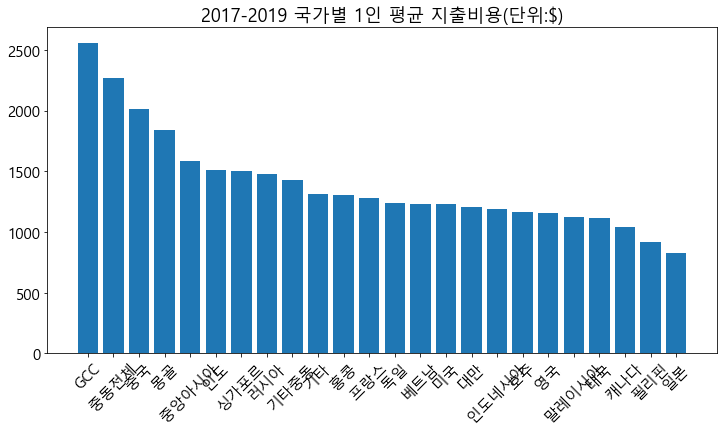

In [24]:
avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['국가']
data = df_avg_expenditure['1인 평균 지출비용']
colors = ['#FBFFB9', '#FDD692', '#EC7357', '#754F44', '#B2EBF4']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.bar(index, data)
plt.title('2017-2019 국가별 1인 평균 지출비용(단위:$)')
plt.show()

In [41]:
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)*1000
FROM expenditure
WHERE class_1 = '거주국'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['국가', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure

,국가,1인 평균 지출비용
0,GCC,2558000.0
1,중동전체,2266000.0
2,중국,2016000.0
3,몽골,1842000.0
4,중앙아시아,1581000.0
5,인도,1514000.0
6,싱가포르,1500000.0
7,러시아,1479000.0
8,기타중동,1429000.0
9,기타,1316000.0


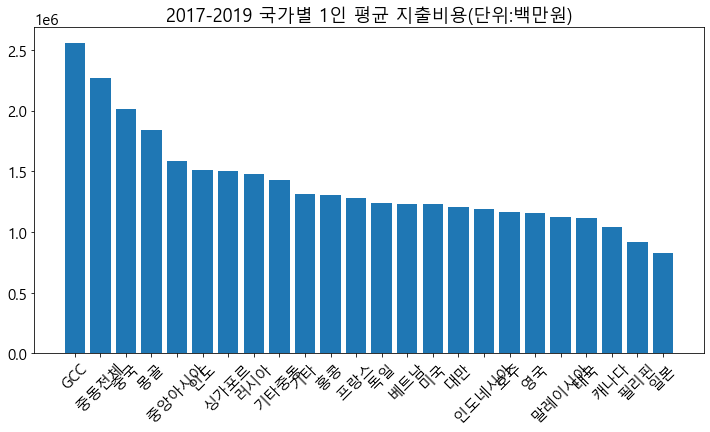

In [42]:
index = df_avg_expenditure['국가']
data = df_avg_expenditure['1인 평균 지출비용']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.bar(index, data)
plt.title('2017-2019 국가별 1인 평균 지출비용(단위:백만원)')
plt.show()

In [26]:
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)*1000
FROM expenditure
WHERE class_1 = '연령'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['연령', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure

,연령,1인 평균 지출비용
0,31~40세,1628000.0
1,21~30세,1590000.0
2,15~20세,1410000.0
3,41~50세,1348000.0
4,모름/무응답,1307000.0
5,51~60세,1212000.0
6,61세 이상,1172000.0


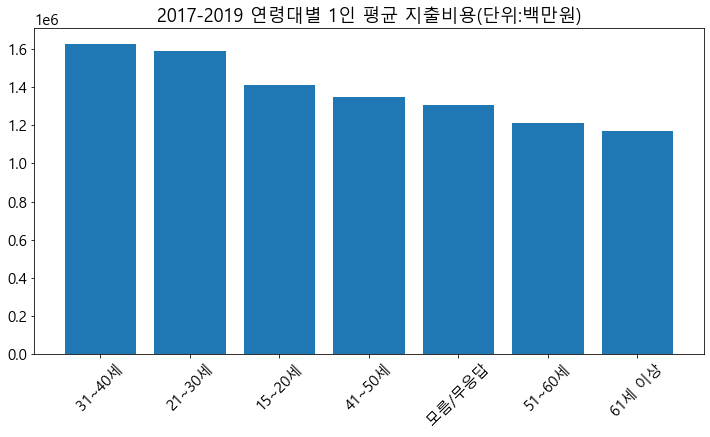

In [27]:
avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['연령']
data = df_avg_expenditure['1인 평균 지출비용']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.bar(index, data)
plt.title('2017-2019 연령대별 1인 평균 지출비용(단위:백만원)')
plt.show()

In [28]:
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT class_2, TRUNCATE(avg(avg_ex),0)*1000
FROM expenditure
WHERE class_1 = '성별'
GROUP BY class_2
ORDER BY 2 desc;"""
cur.execute(q)                        
res = cur.fetchall()     
col = ['성별', '1인 평균 지출비용']
df_avg_expenditure = pd.DataFrame(res, columns = col)
con.close()

df_avg_expenditure

,성별,1인 평균 지출비용
0,여성,1575000.0
1,남성,1403000.0


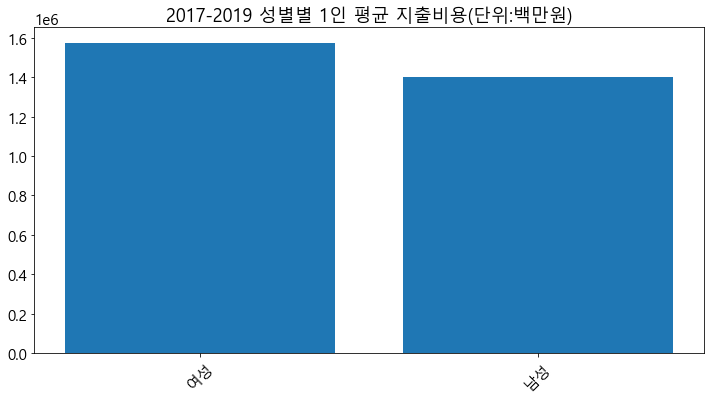

In [29]:
avg_expenditure = df_avg_expenditure
index = df_avg_expenditure['성별']
data = df_avg_expenditure['1인 평균 지출비용']
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.bar(index, data)
plt.title('2017-2019 성별별 1인 평균 지출비용(단위:백만원)')
plt.show()

In [31]:
# 2) 
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT 년_월, SUM(방문자_수)/10000 총_방문자_수
FROM project_csv2
WHERE 년_월 IN ('19-01', '19-02', '19-03', '19-04', '20-01', '20-02', '20-03', '20-04')
GROUP BY 1;
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_VisitbyYear = pd.DataFrame(res)
con.close()
df_VisitbyYear

col = ['년_월', '총_방문자_수']
df_VisitbyYear = pd.DataFrame(res, columns =col)
df_VisitbyYear

,년_월,총_방문자_수
0,19-01,71.1989
1,19-02,120.1802
2,19-03,153.5641
3,19-04,163.5066
4,20-01,127.2708
5,20-02,68.5212
6,20-03,8.3497
7,20-04,2.9415


0     71.1989
1    120.1802
2    153.5641
3    163.5066
Name: 총_방문자_수, dtype: object 4    127.2708
5     68.5212
6      8.3497
7      2.9415
Name: 총_방문자_수, dtype: object


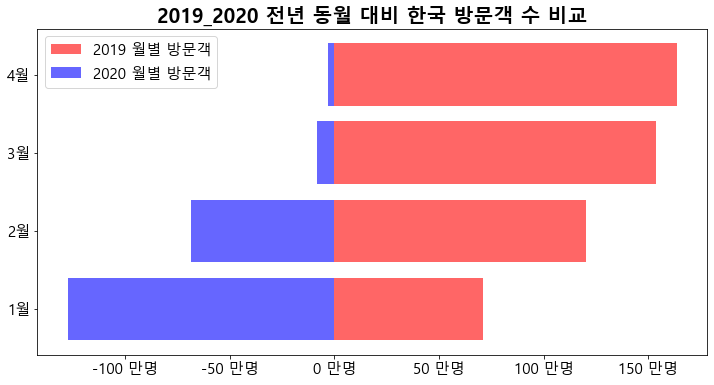

In [32]:
visit_2019 = df_VisitbyYear['총_방문자_수'].head(4)
visit_2020 = df_VisitbyYear["총_방문자_수"].tail(4)
index = ['1월', '2월', '3월', '4월']
print(visit_2019,visit_2020)
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만명'))
plt.barh(index, visit_2019, color = 'r', alpha = 0.6, label='2019 월별 방문객')
plt.barh(index, -(visit_2020), color = 'b', alpha = 0.6, label='2020 월별 방문객')
plt.title('2019_2020 전년 동월 대비 한국 방문객 수 비교', fontsize = 20, fontweight = 'bold')
plt.legend(loc=2, ncol=1)
plt.show()

In [33]:
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT * FROM project_age WHERE date LIKE "%04";"""
cur.execute(q)                        
res = cur.fetchall()                  
df_VisitbyAge = pd.DataFrame(res)
con.close()
df_VisitbyAge

col = ['date', 'under20', 'ageband_20',  'ageband_30',  'ageband_40',  'ageband_50',  'over60']
df_VisitbyAge = pd.DataFrame(res, columns =col)
df_VisitbyAge

,date,under20,ageband_20,ageband_30,ageband_40,ageband_50,over60
0,2011. 04,6.16,19.61,21.97,20.53,17.51,14.22
1,2012. 04,6.22,18.65,21.17,20.24,17.81,15.91
2,2013. 04,5.62,19.87,21.92,19.96,17.88,14.75
3,2014. 04,6.12,20.91,22.42,18.83,17.89,13.82
4,2015. 04,6.16,22.81,22.73,17.80,16.77,13.74
5,2016. 04,5.95,24.38,22.83,16.72,16.27,13.85
6,2017. 04,8.02,22.27,22.90,18.02,16.10,12.70
7,2018. 04,7.03,24.78,24.11,16.83,14.92,12.33
8,2019. 04,8.09,24.18,23.77,16.35,14.51,13.09
9,2020. 04,8.98,44.52,19.88,11.18,9.02,6.41


Text(0.5, 1.0, '2011-2021 외래방문객 방문 연령대 비율 추이(단위:백분율)')

<Figure size 864x432 with 0 Axes>

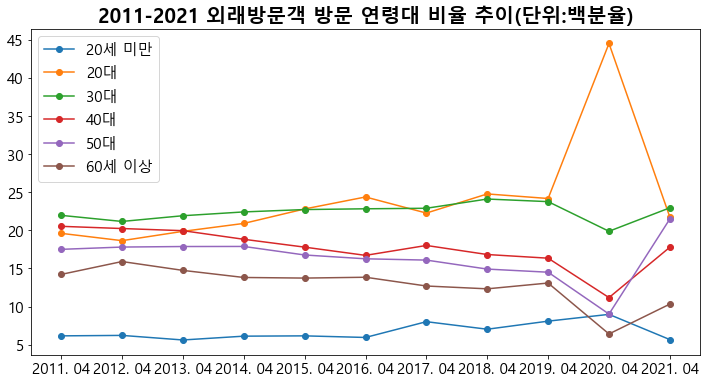

In [34]:
plt.figure(figsize=(12, 6))

# 그래프 틀 그리기
fig = plt.figure(figsize=(12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

# 데이터 만들기
df_under20 = df_VisitbyAge['under20']
df_ageband_20 = df_VisitbyAge['ageband_20']
df_ageband_30 = df_VisitbyAge['ageband_30']
df_ageband_40 = df_VisitbyAge['ageband_40']
df_ageband_50 = df_VisitbyAge['ageband_50']
df_over60 = df_VisitbyAge['over60']
days = df_VisitbyAge['date']

ax.plot(days,df_under20,marker='o',label='20세 미만')
ax.plot(days,df_ageband_20,marker='o',label='20대')
ax.plot(days,df_ageband_30,marker='o',label='30대')
ax.plot(days,df_ageband_40,marker='o',label='40대')
ax.plot(days,df_ageband_50,marker='o',label='50대')
ax.plot(days,df_over60,marker='o',label='60세 이상')


ax.legend()
plt.title("2011-2021 외래방문객 방문 연령대 비율 추이(단위:백분율)", fontsize=20, fontweight = "bold")

In [35]:
con = m.connect(host='localhost', user='root', password='1234', db ='project_py', charset='utf8')
cur = con.cursor()
q = """SELECT * FROM project_age WHERE date LIKE "%08";"""
cur.execute(q)                        
res = cur.fetchall()                  
df_VisitbyAge = pd.DataFrame(res)
con.close()
df_VisitbyAge

col = ['date', 'under20', 'ageband_20',  'ageband_30',  'ageband_40',  'ageband_50',  'over60']
df_VisitbyAge = pd.DataFrame(res, columns =col)
df_VisitbyAge

,date,under20,ageband_20,ageband_30,ageband_40,ageband_50,over60
0,2011. 08,15.82,23.47,19.73,19.95,13.23,7.81
1,2012. 08,17.51,21.98,19.36,20.22,12.90,8.04
2,2013. 08,18.23,21.04,20.35,20.02,12.50,7.86
3,2014. 08,19.59,20.94,20.97,19.10,11.80,7.60
4,2015. 08,15.31,23.38,20.57,18.27,13.66,8.82
5,2016. 08,20.48,23.02,20.08,16.85,11.30,8.27
6,2017. 08,15.26,26.81,19.95,17.12,12.96,7.91
7,2018. 08,16.94,26.30,20.06,16.53,12.10,8.07
8,2019. 08,17.25,26.31,20.74,16.07,11.53,8.10
9,2020. 08,14.46,38.92,16.77,12.09,11.60,6.17


Text(0.5, 1.0, '2011-2021 외래방문객 방문 연령대 비율 추이(단위:백분율)')

<Figure size 864x432 with 0 Axes>

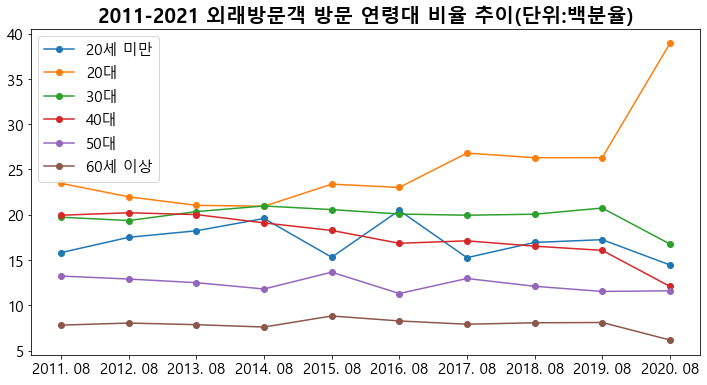

In [36]:
plt.figure(figsize=(12, 6))

# 그래프 틀 그리기
fig = plt.figure(figsize=(12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

# 데이터 만들기
df_under20 = df_VisitbyAge['under20']
df_ageband_20 = df_VisitbyAge['ageband_20']
df_ageband_30 = df_VisitbyAge['ageband_30']
df_ageband_40 = df_VisitbyAge['ageband_40']
df_ageband_50 = df_VisitbyAge['ageband_50']
df_over60 = df_VisitbyAge['over60']
days = df_VisitbyAge['date']

ax.plot(days,df_under20,marker='o',label='20세 미만')
ax.plot(days,df_ageband_20,marker='o',label='20대')
ax.plot(days,df_ageband_30,marker='o',label='30대')
ax.plot(days,df_ageband_40,marker='o',label='40대')
ax.plot(days,df_ageband_50,marker='o',label='50대')
ax.plot(days,df_over60,marker='o',label='60세 이상')


ax.legend()
plt.title("2011-2021 외래방문객 방문 연령대 비율 추이(단위:백분율)", fontsize=20, fontweight = "bold")